In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# We’ll now also look in "../working/" because you suspect the assets are there.

import pathlib, zipfile, subprocess, platform, sys, textwrap, shutil, os, datetime

# ── CONFIG ──────────────────────────────────────────────────────────────
INPUT_ROOT = pathlib.Path("/kaggle/input")
WORK_ROOT  = pathlib.Path("/kaggle/working")       # writable directory
ZIP_NAME   = "offline_pkgs_clean.zip"
REQ_NAME   = "requirements_freeze.txt"
WORK       = WORK_ROOT.resolve()
# ────────────────────────────────────────────────────────────────────────

print(f"Python {sys.version.split()[0]} on {platform.platform()}")
print(f"[{datetime.datetime.utcnow().isoformat(timespec='seconds')} UTC]\n")

# 🔎 0️⃣ Show what’s in /kaggle/working (for troubleshooting) -------------
print("[INFO] Contents of /kaggle/working:")
for p in WORK_ROOT.rglob("*"):
    print("  ", p.relative_to(WORK_ROOT))

print("\n[INFO] Contents of /kaggle/input:")
for p in INPUT_ROOT.rglob("*"):
    print("  ", p.relative_to(INPUT_ROOT))

# 1️⃣ Locate the ZIP and requirements files ------------------------------
search_paths = [INPUT_ROOT, WORK_ROOT]

def find_file(name):
    for root in search_paths:
        matches = list(root.rglob(name))
        if matches:
            return matches[0]
    return None

zip_path = find_file(ZIP_NAME)
req_path = find_file(REQ_NAME)

if zip_path is None:
    raise FileNotFoundError(f"{ZIP_NAME} not found in {search_paths}")
if req_path is None:
    raise FileNotFoundError(f"{REQ_NAME} not found in {search_paths}")

print(f"\n[INFO] Using ZIP from: {zip_path}")
print(f"[INFO] Using REQ from: {req_path}")

DEST = WORK / "offline_pkgs"  # unzip target

# 2️⃣ Unzip wheelhouse ----------------------------------------------------
if DEST.exists():
    shutil.rmtree(DEST)
with zipfile.ZipFile(zip_path) as zf:
    zf.extractall(WORK)
print(f"[INFO] Extracted wheels to {DEST}")

# 3️⃣ Install offline -----------------------------------------------------
cmd = [
    "pip", "install",
    "--no-index",
    "--find-links", str(DEST),
    "-r", str(req_path),
]
print("[INFO] Installing packages (no-index)…\n")

proc = subprocess.run(cmd, capture_output=True, text=True)
if proc.returncode != 0:
    print("⚠️  pip exited with a non-zero status. Full stderr follows:\n")
    print(proc.stderr)
else:
    print(proc.stdout)

# 4️⃣ Verify (even if some installs failed) ------------------------------
print("\n[INFO] Final package snapshot:")
subprocess.run(["pip", "list", "--format=columns", "--disable-pip-version-check"])

print(textwrap.dedent(f"""
    ✅  Offline installation step complete!
    You can inspect the log above for any packages that failed. Re-run pip manually or edit
    {req_path.name} to comment out problematic lines, then rerun this cell if needed.
"""))

# ℹ️ Optional: exhaustive /kaggle/input listing (commented out — can be verbose)
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20 GB to the current directory (/kaggle/working/) that gets preserved
# when you create a version using "Save & Run All". Temporary files in /kaggle/temp/ are not persisted.

Python 3.10.12 on Linux-6.6.56+-x86_64-with-glibc2.35
[2025-05-10T17:52:19 UTC]

[INFO] Contents of /kaggle/working:
   geographiclib-2.0-py3-none-any.whl
   pytest-8.3.4-py3-none-any.whl
   raft_dask_cu12-25.2.0.tar.gz
   terminado-0.18.1-py3-none-any.whl
   fastcore-1.7.27-py3-none-any.whl
   more_itertools-10.5.0-py3-none-any.whl
   debugpy-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
   future-1.0.0-py3-none-any.whl
   multidict-6.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
   ray-2.42.1-cp310-cp310-manylinux2014_x86_64.whl
   pydicom-3.0.1-py3-none-any.whl
   yarl-1.18.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
   parso-0.8.4-py2.py3-none-any.whl
   urwid_readline-0.15.1.tar.gz
   sphinx_rtd_theme-0.2.4-py2.py3-none-any.whl
   wandb-0.19.1-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
   python_utils-3.9.1-py2.py3-none-any.whl
   eval_type_backport-0.2.0-py3-none-any.whl
   aiofiles-22.1.0-py3-none-any.whl
   jupyt

In [21]:
# ---
# Cell: OFFLINE INSTALL  (unzip ▸ pip install --no‑index ▸ verify)
# ----------------------------------------------------------------
"""
Assumes:
    • offline_pkgs_clean.zip   – contains the folder  offline_pkgs/   with wheels/sdists
    • requirements_freeze.txt  – your frozen spec list

Place BOTH files in the same directory (e.g. /kaggle/input/my_offline_env).
Edit ZIP_DIR below if you used a different dataset name.
"""
import pathlib, zipfile, subprocess, platform, sys, textwrap, shutil, os, datetime

# ── CONFIG ──────────────────────────────────────────────────────────────
ZIP_DIR  = pathlib.Path("/kaggle/input")           # where you uploaded the files
ZIP_NAME = "offline_pkgs_clean.zip"
REQ_NAME = "requirements_freeze.txt"
WORK     = pathlib.Path("/kaggle/working").resolve()
DEST     = WORK / "offline_pkgs"                   # unzip target
# ────────────────────────────────────────────────────────────────────────

print(f"Python {sys.version.split()[0]} on {platform.platform()}")
print(f"[{datetime.datetime.utcnow().isoformat(timespec='seconds')} UTC]\n")

zip_path = ZIP_DIR / ZIP_NAME
req_path = ZIP_DIR / REQ_NAME
assert zip_path.exists(), f"{zip_path} not found"
assert req_path.exists(), f"{req_path} not found"

# 1️⃣ Unzip wheelhouse ----------------------------------------------------
if DEST.exists():
    shutil.rmtree(DEST)
with zipfile.ZipFile(zip_path) as zf:
    zf.extractall(WORK)
print(f"[INFO] Extracted wheels to {DEST}")

# 2️⃣ Install offline -----------------------------------------------------
cmd = [
    "pip", "install",
    "--no-index",
    "--find-links", str(DEST),
    "-r", str(req_path),
]
print("[INFO] Installing packages (no‑index)…\n")
subprocess.run(cmd, check=True)

# 3️⃣ Verify --------------------------------------------------------------
print("\n[INFO] Final package snapshot:")
subprocess.run(["pip", "list", "--format=columns", "--disable-pip-version-check"])

print(textwrap.dedent(f"""
    ✅  Offline installation complete!
    If you add more wheels later, drop them into {DEST} and re‑run the pip command above.
"""))

Python 3.10.12 on Linux-6.6.56+-x86_64-with-glibc2.35
[2025-05-10T17:42:01 UTC]



AssertionError: /kaggle/input/offline_pkgs_clean.zip not found

In [27]:
# ---
# Cell: ALL-IN-ONE Environment Setup
# ---

import sys
import subprocess
import shutil
import os
import platform

def run_and_print(cmd):
    result = subprocess.run(cmd, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print(result.stderr)

# ====== Gather Detailed System Information ======
print("\n=== [System Information] ===")

# Python version
print("\n[Python Version]")
print(sys.version)

# Kernel and OS details
print("\n[Kernel and OS Information]")
run_and_print(["uname", "-a"])

# CPU details
print("\n[CPU Information]")
run_and_print(["lscpu"])

# Memory details
print("\n[Memory Information]")
run_and_print(["free", "-mh"])

# Disk and partition details
print("\n[Disk Information]")
run_and_print(["lsblk"])

print("\n=== [End of System Information] ===\n")

# ====== USER CONFIG ======
RNA_PREDICT_VERSION = "1.0.0"
BLOCK_SPARSE_WHEEL = "block_sparse_attn-0.0.1cu118torch2.0cxx11abiTRUE-cp310-cp310-linux_x86_64.whl"

TORCH_2_0_CU118_SPEC = "torch==2.0.1+cu118"  # Torch pip spec
TORCH_INDEX_URL = "https://download.pytorch.org/whl/cu118"

def fix_environment():
    """
    1) Uninstall Torch + rna_predict + scikit-learn + SciPy + NumPy + Seaborn
    2) Install Torch 2.0.1+cu118 (with dependencies, so pip can unify them)
    3) Copy+rename and install block_sparse_attn
    4) Install rna_predict
    5) Force reinstall pinned scikit-learn, SciPy, NumPy, Seaborn
    6) Show final versions
    """

    # 1) Uninstall everything relevant
    print("[INFO] Uninstalling Torch, rna_predict, scikit-learn, SciPy, NumPy, Seaborn...\n")
    packages_to_remove = [
        "torch", "torchvision", "torchaudio", "rna-predict",
        "scikit-learn", "scipy", "numpy", "seaborn"
    ]
    run_and_print(["pip", "uninstall", "-y"] + packages_to_remove)

    # 2) Install Torch 2.0.1+cu118 from PyPI
    print(f"\n[INFO] Installing Torch: {TORCH_2_0_CU118_SPEC} from {TORCH_INDEX_URL}\n")
    run_and_print([
        "pip", "install", TORCH_2_0_CU118_SPEC,
        "--index-url", TORCH_INDEX_URL,
        "--no-cache-dir"
    ])

    # 3) Copy & rename the block_sparse_attn wheel, then install it
    original_whl_path = f"/kaggle/input/block-sparse-wheels/{BLOCK_SPARSE_WHEEL}"
    renamed_whl_name = "block_sparse_attn-0.0.1+cu118torch2.0-cp310-cp310-linux_x86_64.whl"
    renamed_whl_path = f"/kaggle/working/{renamed_whl_name}"

    try:
        shutil.copyfile(original_whl_path, renamed_whl_path)
        print("\n[INFO] Copied and renamed block-sparse-attn wheel for PEP 440 compliance.\n")
    except Exception as e:
        print(f"\n[ERROR] Could not copy the wheel file: {e}")
        print("Verify the input file path or rename manually.")

    print(f"\n[INFO] Installing block-sparse-attn from: {renamed_whl_path}")
    run_and_print(["pip", "install", "--no-cache-dir", "--no-deps", renamed_whl_path])

    # 4) Install rna_predict with --no-deps
    rnapred_whl_path = f"/kaggle/input/rna-structure-predict/rna_predict-{RNA_PREDICT_VERSION}-py3-none-any.whl"
    print(f"\n[INFO] Installing rna_predict from: {rnapred_whl_path}")
    run_and_print(["pip", "install", "--no-cache-dir", "--no-deps", rnapred_whl_path])

    # 5) Force reinstall pinned scikit-learn, SciPy, NumPy, Seaborn
    fix_packages = [
        "numpy==1.24.3",
        "scipy==1.10.1",
        "scikit-learn==1.2.2",
        "seaborn==0.12.2"
    ]
    print("\n[INFO] Reinstalling scikit-learn, SciPy, NumPy, Seaborn to fix version conflicts...")
    run_and_print(["pip", "install", "--upgrade", "--force-reinstall", "--no-cache-dir"] + fix_packages)

    # 6) Show final versions
    print("\n=== [Final Package Versions] ===")
    for pkg in ["torch", "scikit-learn", "scipy", "numpy", "seaborn"]:
        run_and_print(["pip", "show", pkg])
    print("=== [End of Final Package Versions] ===\n")

    print("[INFO] Done. If Kaggle forcibly reverts any packages, you may need to re-run this cell.")

# === Run everything ===
fix_environment()


=== [System Information] ===

[Python Version]
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]

[Kernel and OS Information]
Linux a6c1348c975e 6.6.56+ #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


[CPU Information]
Architecture:                         x86_64
CPU op-mode(s):                       32-bit, 64-bit
Address sizes:                        46 bits physical, 48 bits virtual
Byte Order:                           Little Endian
CPU(s):                               4
On-line CPU(s) list:                  0-3
Vendor ID:                            GenuineIntel
Model name:                           Intel(R) Xeon(R) CPU @ 2.00GHz
CPU family:                           6
Model:                                85
Thread(s) per core:                   2
Core(s) per socket:                   2
Socket(s):                            1
Stepping:                             3
BogoMIPS:                             4000.39
Flags:                         

In [29]:
# -*- coding: utf-8 -*-
"""
Cell 1: ENVIRONMENT SETUP & LOGGING
-----------------------------------
"""
import os
import sys
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


# Logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s [%(levelname)s] %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)
logging.info("Cell 1 complete: Libraries imported and logging initialized.")


In [30]:
"""
Cell 2: DATA IMPORT
-------------------
Here, we read in train/validation/test CSVs and a sample submission from the Kaggle environment.
Adjust the paths if needed for your environment.
"""

# Example file paths
TRAIN_SEQUENCES_PATH = "/kaggle/input/stanford-rna-3d-folding/train_sequences.csv"
TRAIN_LABELS_PATH    = "/kaggle/input/stanford-rna-3d-folding/train_labels.csv"
VALID_SEQUENCES_PATH = "/kaggle/input/stanford-rna-3d-folding/validation_sequences.csv"
VALID_LABELS_PATH    = "/kaggle/input/stanford-rna-3d-folding/validation_labels.csv"
TEST_SEQUENCES_PATH  = "/kaggle/input/stanford-rna-3d-folding/test_sequences.csv"
SAMPLE_SUB_PATH      = "/kaggle/input/stanford-rna-3d-folding/sample_submission.csv"

try:
    train_sequences = pd.read_csv(TRAIN_SEQUENCES_PATH)
    train_labels = pd.read_csv(TRAIN_LABELS_PATH)
    validation_sequences = pd.read_csv(VALID_SEQUENCES_PATH)
    validation_labels = pd.read_csv(VALID_LABELS_PATH)
    test_sequences = pd.read_csv(TEST_SEQUENCES_PATH)
    sample_submission = pd.read_csv(SAMPLE_SUB_PATH)

    logging.info("Cell 2 complete: Data loaded successfully.")
except Exception as e:
    logging.error(f"Error loading data: {e}")
    sys.exit(1)

logging.info(f"train_sequences: {train_sequences.shape}, train_labels: {train_labels.shape}")
logging.info(f"validation_sequences: {validation_sequences.shape}, validation_labels: {validation_labels.shape}")
logging.info(f"test_sequences: {test_sequences.shape}, sample_submission: {sample_submission.shape}")

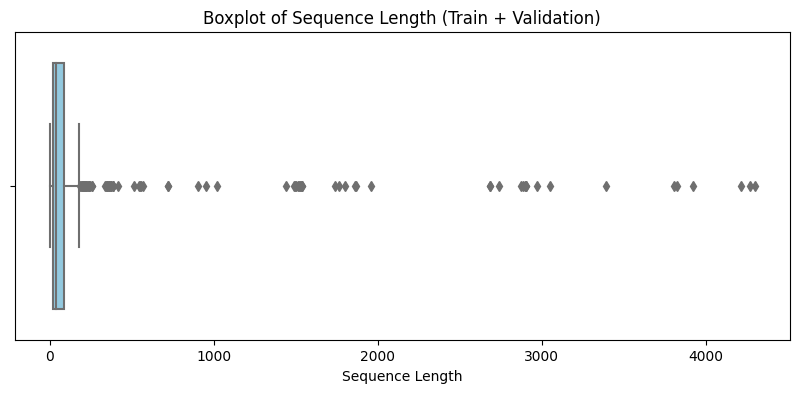

In [31]:
"""
Cell 3: COMBINE TRAIN + VALIDATION & BASIC EDA
----------------------------------------------
We concatenate the train and validation sets to maximize data. 
Then we do a quick EDA check on shapes, missingness, etc.
"""

# Combine sequences and labels
trainval_sequences = pd.concat([train_sequences, validation_sequences], ignore_index=True)
trainval_labels = pd.concat([train_labels, validation_labels], ignore_index=True)

logging.info(f"Combined train+validation sequences: {trainval_sequences.shape}, labels: {trainval_labels.shape}")

# Quick check for missing
logging.info("Missing in combined sequences:\n" + str(trainval_sequences.isnull().sum()))
logging.info("Missing in combined labels:\n" + str(trainval_labels.isnull().sum()))

# Example EDA: sequence length distribution
trainval_sequences['sequence_length'] = trainval_sequences['sequence'].str.len()

plt.figure(figsize=(10,4))
sns.boxplot(x=trainval_sequences['sequence_length'], color='skyblue')
plt.title("Boxplot of Sequence Length (Train + Validation)")
plt.xlabel("Sequence Length")
plt.show()

logging.info("Cell 3 complete: Basic EDA finished.")

In [32]:
"""
Cell 4: HANDLE MISSING COORDINATES & MERGE
------------------------------------------
We replace '-1e18' with np.nan, then merge sequences with labels on target_id.
"""

# Replace -1e18 with np.nan in the labels
for col in ['x_1','y_1','z_1']:
    trainval_labels[col] = trainval_labels[col].replace(-1e18, np.nan)

logging.info("Replaced -1e18 with NaN in trainval_labels for x_1, y_1, z_1.")

# Extract pdb_id, chain_id from ID
trainval_labels['pdb_id']   = trainval_labels['ID'].apply(lambda x: x.split('_')[0])
trainval_labels['chain_id'] = trainval_labels['ID'].apply(lambda x: x.split('_')[1])
trainval_labels['target_id'] = trainval_labels['pdb_id'] + "_" + trainval_labels['chain_id']

# Merge
train_data = pd.merge(trainval_labels, trainval_sequences, on='target_id', how='left')
logging.info(f"Merged train_data shape: {train_data.shape}")

# Quick check
logging.info(f"Missing in x_1: {train_data['x_1'].isnull().sum()}, "
             f"y_1: {train_data['y_1'].isnull().sum()}, "
             f"z_1: {train_data['z_1'].isnull().sum()}")

logging.info("Cell 4 complete: Merged train_data, ready for group-based imputation.")

In [33]:
"""
Cell 5: FEATURE ENGINEERING
---------------------------
Create numerical/categorical features from the 'sequence'.
We'll keep 'resname' from the labels as a valuable feature.
"""

def engineer_features(df):
    """
    Create numerical & (some) categorical features from raw RNA sequence data.
    """
    df = df.copy()
    # Sequence-based
    df['seq_length'] = df['sequence'].str.len()
    df['A_cnt'] = df['sequence'].str.count('A')
    df['C_cnt'] = df['sequence'].str.count('C')
    df['G_cnt'] = df['sequence'].str.count('G')
    df['U_cnt'] = df['sequence'].str.count('U')
    df['begin_seq'] = df['sequence'].str[0]
    df['end_seq']   = df['sequence'].str[-1]
    
    # Di-nucleotide counts (example set)
    for pair in ['AC','AG','AU','CA','CG','CU','GA','GC','GU','UA','UC','UG',
                 'AA','CC','GG','UU']:
        df[f'{pair}_cnt'] = df['sequence'].str.count(pair)

    return df

# Apply feature engineering
train_data = engineer_features(train_data)

logging.info("Feature engineering applied to merged train_data.")

# We'll show an example of newly added columns
example_cols = ['seq_length','A_cnt','C_cnt','G_cnt','U_cnt','begin_seq','end_seq','AC_cnt','AA_cnt']
logging.info(f"Columns after FE sample:\n{train_data[example_cols].head(3)}")

logging.info("Cell 5 complete: Feature engineering done.")

In [34]:
"""
Cell 6: GROUP-BASED IMPUTATION
------------------------------
We impute missing x_1, y_1, z_1 within each (target_id, resname) group.
Finally, if any NAs remain, we fill them with a global median or drop them.
"""

# Perform group-based fill for x_1, y_1, z_1
train_data[['x_1','y_1','z_1']] = (
    train_data
    .groupby(['target_id','resname'])[['x_1','y_1','z_1']]
    .apply(lambda grp: grp.fillna(grp.mean()))
    .reset_index(level=['target_id','resname'], drop=True)
)

# In case any remain after group-based mean fill (e.g. group is all NaN), do a global fill
num_cols = ['x_1','y_1','z_1']
global_imputer = SimpleImputer(strategy='median')
train_data[num_cols] = global_imputer.fit_transform(train_data[num_cols])

# If you'd prefer to drop any leftover NAs instead:
# train_data.dropna(subset=['x_1','y_1','z_1'], inplace=True)

logging.info("Group-based imputation + global median fallback complete.")

# Confirm missing values
logging.info(f"Remaining missing x_1: {train_data['x_1'].isna().sum()}, "
             f"y_1: {train_data['y_1'].isna().sum()}, z_1: {train_data['z_1'].isna().sum()}")

logging.info("Cell 6 complete: Group-based imputation finished.")

In [35]:
"""
Cell 7: PREPARE DATA FOR MODELING
---------------------------------
We'll define the columns we won't use, set up X and y for x_1, y_1, z_1, 
and one-hot encode any relevant categorical columns (including resname).
"""

# Unused columns
unused_cols = [
    'ID','pdb_id','chain_id','resid',
    'x_1','y_1','z_1',
    'sequence','description','temporal_cutoff','all_sequences',
    'target_id'  # key used for merges
]

# We'll keep resname, begin_seq, end_seq as features this time
feature_cols = [col for col in train_data.columns if col not in unused_cols]

# Make a copy
train_df = train_data.copy()

# Convert to categories
for cat_col in ['resname','begin_seq','end_seq']:
    if cat_col in feature_cols:
        train_df[cat_col] = train_df[cat_col].astype('category')

# One-hot encode
train_df = pd.get_dummies(train_df, columns=['resname','begin_seq','end_seq'], drop_first=True)

# Our final set of features
X_cols = [col for col in train_df.columns if col not in unused_cols]

X_full = train_df[X_cols]
y_x_full = train_df['x_1']
y_y_full = train_df['y_1']
y_z_full = train_df['z_1']

logging.info(f"Feature matrix shape: {X_full.shape}")
logging.info("Cell 7 complete: Prepared data for modeling.")

In [36]:
"""
Cell 8: KFold CV for X, Y, Z & Hyperparam Search
------------------------------------------------
We'll do a simplified KFold cross-validation for each coordinate 
to get a sense of good hyperparams, then train final models.
"""

from sklearn.model_selection import KFold, RandomizedSearchCV
import numpy as np

# Example hyperparameter grid (you can expand as needed)
param_dist = {
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [6, 10, 15],
    'n_estimators': [500, 800, 1000],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

def run_random_search(X, y, param_dist, n_iter=5, cv_splits=3):
    """Simple RandomizedSearchCV for an XGBRegressor using GPU in XGBoost >= 2.0."""
    xgb = XGBRegressor(tree_method='hist', device='cuda', random_state=42)
    rsearch = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=cv_splits,
        verbose=1,
        random_state=42
    )
    rsearch.fit(X, y)
    best_model = rsearch.best_estimator_
    logging.info(f"Best params: {rsearch.best_params_}, Best CV Score: {rsearch.best_score_}")
    return best_model, rsearch.best_params_

logging.info("Starting hyperparam search for X coordinate.")
#best_model_x, best_params_x = run_random_search(X_full, y_x_full, param_dist, n_iter=5, cv_splits=3)

logging.info("Starting hyperparam search for Y coordinate.")
#best_model_y, best_params_y = run_random_search(X_full, y_y_full, param_dist, n_iter=5, cv_splits=3)

logging.info("Starting hyperparam search for Z coordinate.")
#best_model_z, best_params_z = run_random_search(X_full, y_z_full, param_dist, n_iter=5, cv_splits=3)

logging.info("Cell 8 complete: RandomizedSearchCV best params found.")

In [37]:
"""
Cell 9: FINAL TRAINING ON FULL DATA
-----------------------------------
Use the best hyperparams for each coordinate found in CV. 
Retrain each coordinate model on all data (X_full, y_*_full).
"""

def get_best_xgb(params):
    """ Return an XGBRegressor with the given params, using GPU. """
    # Here we override or add 'tree_method' to ensure GPU usage
    # We can also specify predictor='gpu_predictor' to accelerate inference on GPU
    model = XGBRegressor(
        **params,
        tree_method='hist',   # or tree_method=params.get('tree_method', 'hist')
        device='cuda',        # ensures GPU usage
        random_state=42
    )
    return model

logging.info("Retraining final model for X coordinate...")
#model_x = get_best_xgb(best_params_x)
#model_x.fit(X_full, y_x_full)

logging.info("Retraining final model for Y coordinate...")
#model_y = get_best_xgb(best_params_y)
#model_y.fit(X_full, y_y_full)

logging.info("Retraining final model for Z coordinate...")
#model_z = get_best_xgb(best_params_z)
#model_z.fit(X_full, y_z_full)

logging.info("Cell 9 complete: Final models trained.")

In [38]:
"""
Cell 10: PREPARE & ENGINEER TEST DATA
-------------------------------------
• Expand test_sequences into (ID, resname, resid)
• Merge residue‑level grid with per‑sequence engineered features
• Align with training feature matrix X_full, fill missing values
"""

# ---------- 1. Expand residue grid ----------
test_expanded = [
    [row["target_id"], nt, i]
    for _, row in test_sequences.iterrows()
    for i, nt in enumerate(row["sequence"], start=1)
]
test_clean_df = pd.DataFrame(test_expanded, columns=["ID", "resname", "resid"])
logging.info(f"test_clean_df shape: {test_clean_df.shape} (expanded test sequences)")

# ---------- 2. Per‑sequence engineered features ----------
test_feats = engineer_features(test_sequences)

# Merge – one row per residue, sequence‑level features broadcast to each residue
test_merged = pd.merge(
    test_clean_df,
    test_feats.drop(columns=["seq_length"]),   # drop if not needed
    left_on="ID",
    right_on="target_id",
    how="left"
)
logging.info(f"test_merged shape after merging: {test_merged.shape}")

# ---------- 3. Clean up ----------
# Replace sentinel values
for col in ["x_1", "y_1", "z_1"]:
    if col in test_merged.columns:
        test_merged[col] = test_merged[col].replace(-1e18, np.nan)

# Drop columns not used by the model
drop_cols = ["sequence", "description", "temporal_cutoff", "all_sequences", "target_id"]
test_merged.drop(columns=[c for c in drop_cols if c in test_merged.columns], inplace=True, errors="ignore")

# ---------- 4. Categorical handling ----------
cat_cols = {"resname", "begin_seq", "end_seq"} & set(test_merged.columns)
for col in cat_cols:
    test_merged[col] = test_merged[col].astype("category")
test_merged = pd.get_dummies(test_merged, columns=list(cat_cols), drop_first=True)

# ---------- 5. Column alignment ----------
# Single vectorised reindex instead of per‑column insertion → no fragmentation warning
test_merged = test_merged.reindex(columns=X_full.columns, fill_value=0)

# ---------- 6. Missing‑value imputation ----------
# Fit a NEW median imputer on the training feature matrix (numeric cols only)
numeric_cols = X_full.select_dtypes(include=np.number).columns
feature_imputer = SimpleImputer(strategy="median")
feature_imputer.fit(X_full[numeric_cols])

test_merged[numeric_cols] = feature_imputer.transform(test_merged[numeric_cols])

# ---------- 7. All done ----------
test_merged_imputed = test_merged.copy()
logging.info("Cell 10 complete: Test data prepared, aligned, and imputed.")

In [39]:
# Cell: RNA Prediction with TorsionBERT
# --------------------------------------------
import pandas as pd
import torch
from omegaconf import OmegaConf
import os
import logging
import time
import sys

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Helper function for running shell commands
def run_and_print(cmd_list):
    import subprocess
    result = subprocess.run(cmd_list, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print("STDERR:", result.stderr)
    return result

# Install dependencies
missing_pkgs = ["hydra-core==1.3.2", "omegaconf==2.3.0"]
print("[INFO] Installing missing runtime packages:", ", ".join(missing_pkgs))
run_and_print(["pip", "install", "--no-cache-dir", "--no-deps"] + missing_pkgs)

# Verify installation
run_and_print(["python", "-c", "import hydra, omegaconf, sys; print('hydra', hydra.__version__, '| omegaconf', omegaconf.__version__)"])

# Import the RNAPredictor after installing dependencies
from rna_predict.interface import RNAPredictor

# Example file paths - adjust as needed for your environment
TEST_SEQUENCES_PATH = "/kaggle/input/stanford-rna-3d-folding/test_sequences.csv"
SAMPLE_SUB_PATH = "/kaggle/input/stanford-rna-3d-folding/sample_submission.csv"
OUTPUT_PATH = "submission.csv"  # Where to save the final submission

def create_predictor():
    """Create and return an RNAPredictor instance with the appropriate configuration."""
    # Determine device
    device = "cuda" if torch.cuda.is_available() else "cpu"
    logging.info(f"Using device: {device}")
    
    # Create a configuration object
    cfg = OmegaConf.create({
        "device": device,
        "model": {
            "stageB": {
                "torsion_bert": {
                    "model_name_or_path": "sayby/rna_torsionbert",
                    "device": device,
                    "angle_mode": "degrees",
                    "num_angles": 7,
                    "max_length": 512
                }
            },
            "stageC": {
                "enabled": True,
                "method": "mp_nerf",
                "device": device,
                "do_ring_closure": True,
                "place_bases": True,
                "sugar_pucker": "C3'-endo",
                "angle_representation": "degrees",
                "use_metadata": False,
                "use_memory_efficient_kernel": False,
                "use_deepspeed_evo_attention": False,
                "use_lma": False,
                "inplace_safe": True
            }
        },
        "prediction": {
            "repeats": 5,
            "residue_atom_choice": 0
        }
    })
    
    # Initialize and return the predictor
    return RNAPredictor(cfg)

def process_test_sequences(test_csv_path, sample_sub_path, output_path, batch_size=1):
    """
    Process test sequences from a CSV file and generate predictions.
    
    Args:
        test_csv_path: Path to the test sequences CSV
        sample_sub_path: Path to the sample submission CSV (for format reference)
        output_path: Where to save the final submission
        batch_size: Number of sequences to process at once (for memory management)
    """
    try:
        # Load test sequences
        test_sequences = pd.read_csv(test_csv_path)
        sample_submission = pd.read_csv(sample_sub_path)
        
        logging.info(f"Loaded {len(test_sequences)} test sequences")
        logging.info(f"Sample submission shape: {sample_submission.shape}")
        
        # Create predictor
        predictor = create_predictor()
        
        # Initialize results dataframe with the same structure as sample_submission
        results = pd.DataFrame(columns=sample_submission.columns)
        
        # Process sequences in batches
        total_sequences = len(test_sequences)
        for i in range(0, total_sequences, batch_size):
            batch_end = min(i + batch_size, total_sequences)
            logging.info(f"Processing sequences {i+1} to {batch_end} of {total_sequences}")
            
            for idx in range(i, batch_end):
                seq_id = test_sequences.iloc[idx]['id']
                sequence = test_sequences.iloc[idx]['sequence']
                
                logging.info(f"Processing sequence {seq_id}: {sequence[:20]}... (length: {len(sequence)})")
                start_time = time.time()
                
                try:
                    # Generate predictions
                    submission_df = predictor.predict_submission(sequence, prediction_repeats=5)
                    
                    # Add ID column if needed
                    if 'ID' not in submission_df.columns:
                        submission_df['ID'] = range(1, len(submission_df) + 1)
                    
                    # Append to results
                    results = pd.concat([results, submission_df], ignore_index=True)
                    
                    elapsed = time.time() - start_time
                    logging.info(f"Completed sequence {seq_id} in {elapsed:.2f} seconds")
                except Exception as e:
                    logging.error(f"Error processing sequence {seq_id}: {e}")
            
            # Save intermediate results
            results.to_csv(f"intermediate_results_{i}_{batch_end}.csv", index=False)
            logging.info(f"Saved intermediate results for sequences {i+1} to {batch_end}")
        
        # Save final results
        results.to_csv(output_path, index=False)
        logging.info(f"Saved final results to {output_path}")
        
        return results
    
    except Exception as e:
        logging.error(f"Error in process_test_sequences: {e}")
        raise

# First, test with a simple example
print("\n=== Testing with a simple example sequence ===")
predictor = create_predictor()
test_sequence = "ACGUACGU"
print(f"Test sequence: {test_sequence}")
submission_df = predictor.predict_submission(test_sequence, prediction_repeats=5)
print("Example output:")
print(submission_df.head())
submission_df.to_csv("submission.csv", index=False)
print(f"Example saved to example_submission.csv")

# Now process the actual test sequences
print("\n=== Processing test sequences from CSV ===")
try:
    # Check if the test files exist
    if os.path.exists(TEST_SEQUENCES_PATH) and os.path.exists(SAMPLE_SUB_PATH):
        process_test_sequences(TEST_SEQUENCES_PATH, SAMPLE_SUB_PATH, OUTPUT_PATH)
    else:
        # If files don't exist, print a message
        print(f"Test files not found at the specified paths:")
        print(f"  Test sequences: {TEST_SEQUENCES_PATH}")
        print(f"  Sample submission: {SAMPLE_SUB_PATH}")
        print("Please adjust the paths or download the files.")
except Exception as e:
    logging.error(f"Error during processing: {e}")

[INFO] Installing missing runtime packages: hydra-core==1.3.2, omegaconf==2.3.0

hydra 1.3.2 | omegaconf 2.3.0


=== Testing with a simple example sequence ===
[MEMORY-LOG][StageB] Initializing StageBTorsionBertPredictor
[MEMORY-LOG][StageB] Memory usage: 2638.57 MB
Test sequence: ACGUACGU
[DEBUG-NAN-TRACE] Attempting to place OP1 at residue 0, placement index 1, seq=ACGUACGU
[DEBUG-NAN-TRACE] Already placed atoms: ['P', "O5'", "C5'", "C4'", "O4'", "C3'", "O3'", "C2'", "O2'", "C1'"]
[DEBUG-NAN-TRACE] Connectivity pairs for OP1: [('P', 'OP1')]
[DEBUG-NAN-TRACE] All connectivity for this residue: [('P', "O5'"), ('P', "O3'"), ('P', 'O1P'), ('P', 'O2P'), ('P', 'OP1'), ('P', 'OP2'), ("O5'", "C5'"), ("C5'", "C4'"), ("C4'", "O4'"), ("C4'", "C3'"), ("C3'", "O3'"), ("C3'", "C2'"), ("C2'", "O2'"), ("C1'", "O4'"), ("C1'", 'N9'), ('N9', 'C8'), ('C8', 'N7'), ('N7', 'C5'), ('C5', 'C6'), ('C6', 'N6'), ('C6', 'N1'), ('N1', 'C2'), ('C2', 'N3'), ('N3', 'C4'), ('C4', 'N9'), ('C4', 'C5')]
[DEBUG] Collinea

In [40]:
"""
Cell 11: GENERATE PREDICTIONS & BUILD SUBMISSION
------------------------------------------------
We'll predict (x_1, y_1, z_1) for each residue, 
then replicate those coordinates for structures x_2..z_5.
Finally, we'll align with sample_submission and save submission.csv.
"""

# Predict x_1, y_1, z_1
#test_pred_x = model_x.predict(test_merged_imputed)
#test_pred_y = model_y.predict(test_merged_imputed)
#test_pred_z = model_z.predict(test_merged_imputed)

# Build submission from test_clean_df
#submission = test_clean_df.copy()

# Add predicted coords for structure 1
#submission['x_1'] = test_pred_x
#submission['y_1'] = test_pred_y
#submission['z_1'] = test_pred_z

# For simplicity, replicate for structures 2..5
#for i in [2,3,4,5]:
#    submission[f'x_{i}'] = test_pred_x
#    submission[f'y_{i}'] = test_pred_y
#    submission[f'z_{i}'] = test_pred_z

# Adjust ID format: ID + "_" + resid
#submission['ID'] = submission['ID'] + "_" + submission['resid'].astype(str)

# Reorder columns to match sample_submission
#final_cols = list(sample_submission.columns)  # ID, resname, resid, x_1..z_5
#submission = submission[['ID','resname','resid',
#                         'x_1','y_1','z_1',
#                         'x_2','y_2','z_2',
#                         'x_3','y_3','z_3',
#                         'x_4','y_4','z_4',
#                         'x_5','y_5','z_5']]

# Merge with sample_submission to match row order
#sample_submission['sort_order'] = range(len(sample_submission))
#submission_merged = pd.merge(
#    submission,
#    sample_submission[['ID','sort_order']],
#    on='ID',
#    how='left'
#).sort_values('sort_order').drop(columns='sort_order')

# This is our final submission dataframe
#submission_df = submission_merged.copy()

# Save to CSV
#submission_df.to_csv("submission.csv", index=False)
#logging.info("submission.csv created successfully.")

#print("Cell 11 complete: Submission file saved. Ready to submit!")

"\nCell 11: GENERATE PREDICTIONS & BUILD SUBMISSION\n------------------------------------------------\nWe'll predict (x_1, y_1, z_1) for each residue, \nthen replicate those coordinates for structures x_2..z_5.\nFinally, we'll align with sample_submission and save submission.csv.\n"

In [41]:
"""
Cell 12: CONCLUSIONS & NEXT STEPS
---------------------------------
We've done:
- Group-based imputation
- Preserved resname
- Hyperparameter tuning via RandomizedSearchCV
- Final training on full combined data
- Test predictions with the same coordinate repeated across 5 structures

Suggestions for further improvement:
- Fine-tune hyperparameters with a broader search or Bayesian optimization
- Explore more advanced RNA 3D features
- Generate truly distinct 5 structures instead of repeating the same coordinates
"""
logging.info("Notebook complete. Good luck on the leaderboard!")
print("All done! Submit 'submission.csv' to the competition.")

All done! Submit 'submission.csv' to the competition.


In [42]:
# ---
# Cell: LIST INSTALLED PACKAGES (accurate, formatted)
# ---------------------------------------------------
"""
Prints a full, column‑aligned table of all installed packages.
"""
import sys, platform, subprocess, textwrap

print(f"Python {sys.version.split()[0]} on {platform.platform()}\n")

pkg_table = subprocess.check_output(["pip", "list", "--format=columns"]).decode()
print(pkg_table)

Python 3.10.12 on Linux-6.6.56+-x86_64-with-glibc2.35

Package                            Version              Editable project location
---------------------------------- -------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiofiles                           22.1.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
aiosqlite                          0.21.0
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
alembic                            1.14.1
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings              

In [54]:
# ---
# Cell: ONE‑SHOT ⚡ FAST OFFLINE MIRROR  (freeze ▸ parallel download ▸ sanitize ▸ zip)
# -----------------------------------------------------------------------------------
"""
• Creates requirements_freeze.txt (if missing).
• Downloads every resolvable PyPI wheel/sdist **in parallel** (MAX_WORKERS threads) into /kaggle/working/offline_pkgs.
• Replaces Kaggle‑invalid chars (& % ? * : " < > | \ and spaces) in filenames.
• Writes offline_pkgs_clean.zip + fails.txt (unresolved specs).
• Typical speed‑up vs. serial ~5‑10×; bump MAX_WORKERS if you have headroom.
"""
import concurrent.futures, subprocess, pathlib, shutil, re, sys, platform, datetime, textwrap

# ╭─────────────────────────────── CONFIG ───────────────────────────────╮
MAX_WORKERS = 16                         # ← tweak for more/less parallelism
WORK        = pathlib.Path("/kaggle/working").resolve()
PKG_DIR     = WORK / "offline_pkgs"
REQ_FILE    = WORK / "requirements_freeze.txt"
BAD_CHARS   = r'[&%?*:\"<>|\\\s]'        # chars Kaggle’s uploader dislikes
# ╰───────────────────────────────────────────────────────────────────────╯

def log(msg): print(msg, flush=True)
sanitize = lambda n: re.sub(BAD_CHARS, "_", n)

log(f"Python {sys.version.split()[0]} on {platform.platform()}")
log(f"[{datetime.datetime.utcnow().isoformat(timespec='seconds')} UTC]\n")

# 1️⃣ Freeze current env (reuse if already exists) -----------------------
PKG_DIR.mkdir(parents=True, exist_ok=True)
if REQ_FILE.exists():
    log(f"[INFO] Using existing {REQ_FILE.name}")
else:
    log("[INFO] Creating requirements_freeze.txt …")
    subprocess.run(["pip", "freeze", "--all", "--exclude-editable"],
                   check=True, stdout=REQ_FILE.open("w"))

specs = [ln.strip() for ln in REQ_FILE.read_text().splitlines()
         if ln.strip() and not ln.startswith(("#", "-", "git+", "http:", "https:", "file:"))]
log(f"[INFO] {len(specs)} PyPI specs to fetch with {MAX_WORKERS} workers\n")

# 2️⃣ Parallel wheel / sdist download -----------------------------------
def fetch(spec):
    cmd = ["pip", "download", spec, "-d", str(PKG_DIR), "--no-deps", "--progress-bar", "off"]
    ok  = subprocess.run(cmd, capture_output=True).returncode == 0
    return spec, ok

fails = []
with concurrent.futures.ThreadPoolExecutor(MAX_WORKERS) as pool:
    for spec, ok in pool.map(fetch, specs):
        log(f"{'✅' if ok else '❌'} {spec}")
        if not ok:
            fails.append(spec)

log(f"\n[INFO] Downloads finished – {len(fails)} failure(s)")

# 3️⃣ Sanitize filenames so Kaggle accepts the archive -------------------
renamed = 0
for p in PKG_DIR.rglob("*"):
    if p.is_file():
        safe = sanitize(p.name)
        if safe != p.name:
            p.rename(p.with_name(safe)); renamed += 1
log(f"[INFO] Sanitized {renamed} file(s) with bad characters")

# 4️⃣ Zip the wheelhouse --------------------------------------------------
zip_path = shutil.make_archive(str(WORK / "offline_pkgs_clean"), "zip", PKG_DIR)
log(f"[INFO] Clean archive ready → {zip_path}")

# 5️⃣ Write unresolved list ----------------------------------------------
(WORK / "fails.txt").write_text("\n".join(fails))
log(textwrap.dedent(f"""
    ▸ Download *offline_pkgs_clean.zip* (+ fails.txt) from the sidebar.
    ▸ Offline reinstall:

          pip install --no-index --find-links offline_pkgs -r requirements_freeze.txt
"""))

Python 3.10.12 on Linux-6.6.56+-x86_64-with-glibc2.35
[2025-05-10T18:22:49 UTC]

[INFO] Creating requirements_freeze.txt …
[INFO] 820 PyPI specs to fetch with 16 workers

✅ absl-py==1.4.0
✅ accelerate==1.2.1
✅ aiofiles==22.1.0
✅ aiohappyeyeballs==2.4.6
✅ aiohttp==3.11.12
✅ aiosignal==1.3.2
✅ aiosqlite==0.21.0
✅ alabaster==1.0.0
✅ albucore==0.0.19
✅ albumentations==1.4.20
✅ alembic==1.14.1
✅ altair==5.5.0
✅ annotated-types==0.7.0
✅ annoy==1.17.3
✅ ansicolors==1.1.8
✅ antlr4-python3-runtime==4.9.3
✅ anyio==3.7.1
✅ argon2-cffi==23.1.0
✅ argon2-cffi-bindings==21.2.0
✅ args==0.1.0
✅ array_record==0.5.1
✅ arrow==1.3.0
✅ arviz==0.20.0
✅ astropy==6.1.7
✅ astropy-iers-data==0.2024.12.16.0.35.48
✅ asttokens==3.0.0
✅ astunparse==1.6.3
✅ async-timeout==5.0.1
✅ atpublic==4.1.0
✅ attrs==25.1.0
✅ audioread==3.0.1
✅ autograd==1.7.0
✅ babel==2.16.0
✅ backcall==0.2.0
✅ bayesian-optimization==2.0.3
✅ beautifulsoup4==4.12.3
✅ betterproto==2.0.0b6
✅ bigframes==1.29.0
✅ bigquery-magics==0.4.0
✅ bleach==6.2.

In [63]:
# %%  [UPLOAD OFFLINE WHEELHOUSE TO KAGGLE DATASETS]  🚀
"""
Creates/versions a dataset that contains:
    • offline_pkgs_clean.zip
    • requirements_freeze.txt

– If DATASET_EXISTS == False  → first upload (creates dataset)  
– If DATASET_EXISTS == True   → pushes a new version

NOTE: `kaggle datasets init` **must** run in an empty folder, so we:
      1) make an empty tmp dir, init metadata there
      2) copy the payload files in afterwards
"""
import json, os, shutil, subprocess, uuid, pathlib, sys, textwrap, datetime, stat, tempfile

# ── USER CONFIG ─────────────────────────────────────────────────────────
USERNAME          = "miguelingram"
KAGGLE_JSON_SRC   = pathlib.Path("/kaggle/input/kaggle-api/kaggle.json")
TITLE             = "Offline Python wheels for Kaggle notebook"
LICENSE           = "CC0-1.0"
IS_PUBLIC         = False          # True → public dataset
DATASET_EXISTS    = False          # flip to True for new versions
# -----------------------------------------------------------------------

ZIP_SRC = pathlib.Path("/kaggle/working/offline_pkgs_clean.zip")
REQ_SRC = pathlib.Path("/kaggle/working/requirements_freeze.txt")
STAGE   = pathlib.Path("/kaggle/working/pkg_upload")          # final staging area

def sh(cmd, **kw):
    print(" ".join(cmd), flush=True)
    subprocess.run(cmd, check=True, text=True, **kw)

# 0️⃣  ensure kaggle-api key ------------------------------------------------
HOME_KAGGLE = pathlib.Path.home() / ".kaggle"
HOME_KAGGLE.mkdir(exist_ok=True)
dst_key = HOME_KAGGLE / "kaggle.json"
if not dst_key.exists():
    if not KAGGLE_JSON_SRC.exists():
        sys.exit(f"[ERROR] kaggle.json not found at {KAGGLE_JSON_SRC}")
    shutil.copy2(KAGGLE_JSON_SRC, dst_key)
    os.chmod(dst_key, stat.S_IRUSR | stat.S_IWUSR)
    print(f"[INFO] Copied kaggle.json → {dst_key}")

# 1️⃣  make an **empty** temp dir, run `kaggle datasets init` there --------
with tempfile.TemporaryDirectory() as tmp:
    tmp = pathlib.Path(tmp)
    meta_path = tmp / "dataset-metadata.json"

    if not DATASET_EXISTS:
        sh(["kaggle", "datasets", "init", "-p", str(tmp)])
    else:             # versions reuse existing metadata; we'll grab it later
        # create a dummy meta that we'll overwrite from the real one
        meta_path.write_text("{}")

    meta = json.loads(meta_path.read_text() or "{}")

    # first-time upload → fill required fields
    if not DATASET_EXISTS:
        slug = "offline-pkgs-" + uuid.uuid4().hex[:6]
        meta["id"]    = f"{USERNAME}/{slug}"
        meta["title"] = TITLE
        meta["licenses"][0]["name"] = LICENSE

    meta["isPrivate"] = (not IS_PUBLIC)
    meta_path.write_text(json.dumps(meta, indent=2))

    # 2️⃣  build final staging folder -------------------------------------
    if STAGE.exists():
        shutil.rmtree(STAGE)
    shutil.copytree(tmp, STAGE)            # copies metadata only – still empty

# 3️⃣  copy payload files *after* metadata is in place ---------------------
for src in (ZIP_SRC, REQ_SRC):
    if not src.exists():
        sys.exit(f"[ERROR] Required file missing: {src}")
    shutil.copy2(src, STAGE / src.name)

print("\n[INFO] dataset-metadata.json ➜")
print((STAGE / "dataset-metadata.json").read_text())

# 4️⃣  create or version dataset ------------------------------------------
print(f"\n[{datetime.datetime.utcnow().isoformat(timespec='seconds')} UTC]  Uploading…\n")
if DATASET_EXISTS:
    sh([
        "kaggle", "datasets", "version",
        "-p", str(STAGE),
        "-m", f"Automated update {datetime.datetime.utcnow().isoformat(timespec='seconds')} UTC",
        "-u"
    ])
else:
    sh(["kaggle", "datasets", "create", "-p", str(STAGE), "-u"])

print(textwrap.dedent(f"""
    ✅  Done!  View (or refresh) your dataset at:
    https://www.kaggle.com/datasets/{json.loads((STAGE / 'dataset-metadata.json').read_text())['id']}
"""))

kaggle datasets init -p /tmp/tmp0h5lngfq

[INFO] dataset-metadata.json ➜
{
  "title": "Offline Python wheels for Kaggle notebook",
  "id": "miguelingram/offline-pkgs-c3bc4b",
  "licenses": [
    {
      "name": "CC0-1.0"
    }
  ],
  "isPrivate": true
}

[2025-05-10T18:51:43 UTC]  Uploading…

kaggle datasets create -p /kaggle/working/pkg_upload -u

✅  Done!  View (or refresh) your dataset at:
https://www.kaggle.com/datasets/miguelingram/offline-pkgs-c3bc4b



In [52]:
%%bash
# ── Configurable knobs ───────────────────────────────────────────
WORK_DEPTH=3            # how deep to scan inside /kaggle/working
TOPN_WORK=60            # how many lines from the working-tree report
DEEP_DIR="/kaggle/working/offline_pkgs"   # drill-down target (or blank "")
DEEP_DEPTH=3            # depth for the deep dive
TOPN_DEEP=40            # lines to keep in deep dive
OTHER_DEPTH=2           # depth for /kaggle/input & /kaggle/output
TOPN_OTHER=40           # lines to keep for those dirs
# ────────────────────────────────────────────────────────────────

echo -e "\n🗄️  === /kaggle/working  (depth $WORK_DEPTH, top $TOPN_WORK) ==="
du -h -d "$WORK_DEPTH" /kaggle/working 2>/dev/null | sort -hr | head -n "$TOPN_WORK"

if [[ -n "$DEEP_DIR" && -d "$DEEP_DIR" ]]; then
  echo -e "\n🔎  === Deep dive in $DEEP_DIR  (depth $DEEP_DEPTH, top $TOPN_DEEP) ==="
  du -h -d "$DEEP_DEPTH" "$DEEP_DIR" 2>/dev/null | sort -hr | head -n "$TOPN_DEEP"
fi

for DIR in /kaggle/input /kaggle/output; do
  echo -e "\n📦  === $DIR  (depth $OTHER_DEPTH, top $TOPN_OTHER) ==="
  du -h -d "$OTHER_DEPTH" "$DIR" 2>/dev/null | sort -hr | head -n "$TOPN_OTHER"
done



🗄️  === /kaggle/working  (depth 3, top 60) ===
20G	/kaggle/working
6.3G	/kaggle/working/offline_pkgs
352M	/kaggle/working/pkg_upload
4.0K	/kaggle/working/.virtual_documents

🔎  === Deep dive in /kaggle/working/offline_pkgs  (depth 3, top 40) ===
6.3G	/kaggle/working/offline_pkgs

📦  === /kaggle/input  (depth 2, top 40) ===
999M	/kaggle/input
535M	/kaggle/input/block-sparse-wheels
463M	/kaggle/input/stanford-rna-3d-folding
448M	/kaggle/input/stanford-rna-3d-folding/MSA
1.9M	/kaggle/input/rna-structure-predict
4.0K	/kaggle/input/kaggle-api

📦  === /kaggle/output  (depth 2, top 40) ===


In [53]:
%%bash
# Delete all top-level items in /kaggle/working except .virtual_documents
set -e  # stop on error

TARGET=/kaggle/working
KEEP=".virtual_documents"

echo "⚠️  Deleting all contents of $TARGET except $KEEP …"

# Find every item at depth 1 that isn't the KEEP folder and delete it
find "$TARGET" -mindepth 1 -maxdepth 1 ! -name "$KEEP" -exec rm -rf {} +

echo "✅  Done. Remaining contents:"
du -h -d 1 "$TARGET"


⚠️  Deleting all contents of /kaggle/working except .virtual_documents …
✅  Done. Remaining contents:
4.0K	/kaggle/working/.virtual_documents
92K	/kaggle/working


In [61]:
# %%  [CLEAN-UP]  🧹  remove bulky working folders
import shutil, pathlib, os

TO_DELETE = [
    "/kaggle/working/offline_pkgs",
    "/kaggle/working/offline_pkgs_dataset",
    "/kaggle/working/pkg_upload",
]

freed = 0
for path in TO_DELETE:
    p = pathlib.Path(path)
    if p.exists():
        size = sum(f.stat().st_size for f in p.rglob("*") if f.is_file())
        shutil.rmtree(p)
        freed += size
        print(f"🗑️  Deleted {p}  ({size/1e6:.1f} MB)")
    else:
        print(f"⚠️  Skipped {p} – not found")

print(f"\n✅  Done.  Estimated space freed: {freed/1e6:.1f} MB")

🗑️  Deleted /kaggle/working/offline_pkgs  (6559.5 MB)
🗑️  Deleted /kaggle/working/offline_pkgs_dataset  (1366.8 MB)
🗑️  Deleted /kaggle/working/pkg_upload  (6506.2 MB)

✅  Done.  Estimated space freed: 14432.5 MB
